In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import date, datetime

In [2]:
start_date = '2014-05-31'
end_date = datetime.today()

In [3]:
df = yf.download('^GSPC',start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-06,5357.799805,5362.350098,5335.359863,5352.959961,5352.959961,3609990000
2024-06-07,5343.810059,5375.080078,5331.330078,5346.990234,5346.990234,3692760000
2024-06-10,5341.220215,5365.790039,5331.520020,5360.790039,5360.790039,3622280000
2024-06-11,5353.000000,5375.950195,5327.250000,5375.319824,5375.319824,3568030000
2024-06-12,5409.129883,5447.250000,5409.129883,5421.029785,5421.029785,3962840000


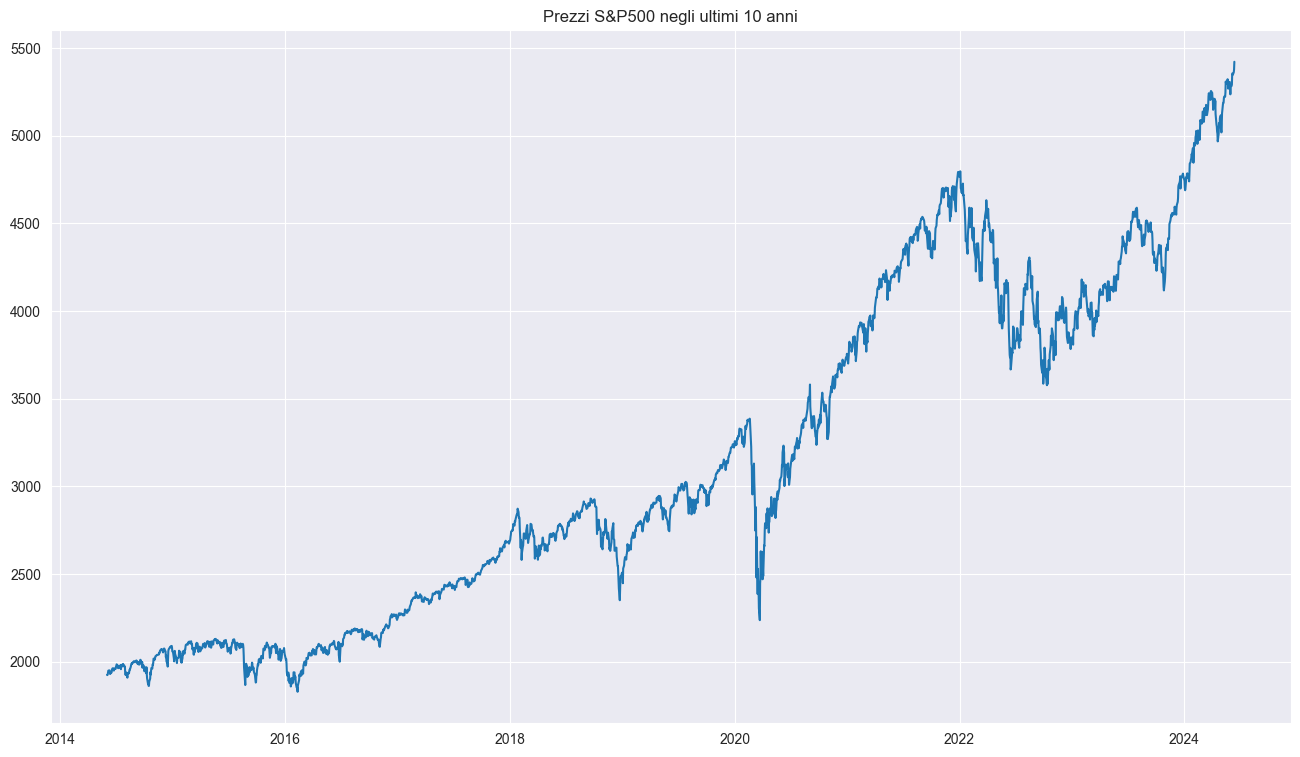

In [5]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Adj Close'])
plt.title('Prezzi S&P500 negli ultimi 10 anni')
plt.grid(True)

In [6]:
# train test split
to_row = int(len(df)*0.9) # prende la riga che suddivide il dataframe in 90% - 10% (tipo 90esimo percentile)
training_data = list(df[0:to_row]['Adj Close']) # il training set è così fatto dal 90% dei dati
testing_data = list(df[to_row:]['Adj Close']) # il test set è composto dal rimanente 10% dei dati

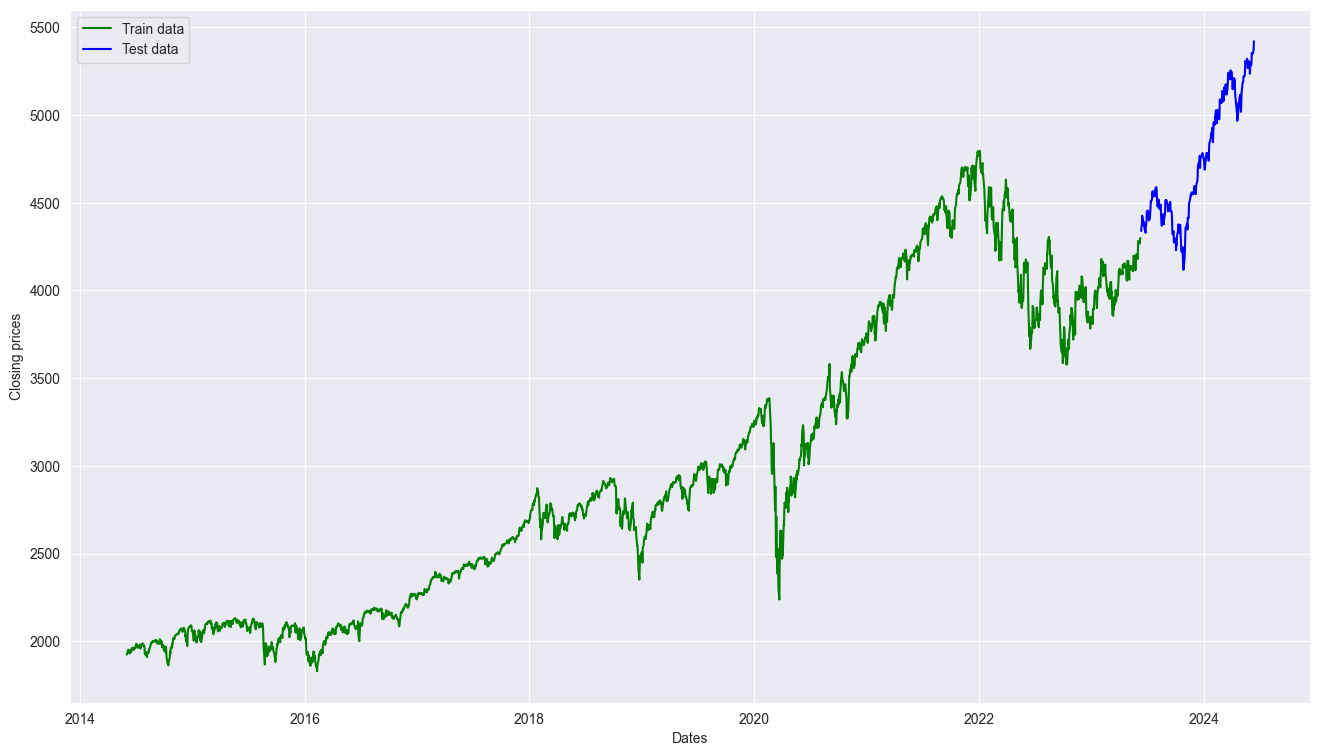

In [7]:
plt.figure(figsize=(16,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()
plt.show()

In [8]:
model_predictions = []
n_test_obser = len(testing_data)


 Initialize the list for storing predictions
model_predictions = []

 Fit the ARIMA model on the initial training data
model = ARIMA(training_data, order=(4,1,1))
model_fit = model.fit()

 Loop over the test set
for i in range(n_test_obser):
    # Forecast the next value
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    
    # Get the actual test value
    actual_test_value = testing_data[i]
    
    # Append the actual value to the training data
    training_data.append(actual_test_value)
    
    # Refit the model with the updated training data
    model = ARIMA(training_data, order=(4,1,1))
    model_fit = model.fit()

#Convert the model predictions to a numpy array for further analysis if needed
model_predictions = np.array(model_predictions)
    

In [9]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assume training_data and testing_data are already defined
# and n_test_obser is the number of test observations
# Convert lists to numpy arrays if they are not already
training_data = np.array(training_data)
testing_data = np.array(testing_data)

# Initialize the list for storing predictions
model_predictions = []

# Fit the ARIMA model on the initial training data
model = ARIMA(training_data, order=(2, 1, 1))
model_fit = model.fit()

# Loop over the test set
for i in range(n_test_obser):
    # Forecast the next value
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    model_predictions.append(yhat)
    
    # Get the actual test value
    actual_test_value = testing_data[i]
    
    # Append the actual value to the training data
    training_data = np.append(training_data, actual_test_value)
    
    # Refit the model with the updated training data
    model = ARIMA(training_data, order=(2, 1, 1))
    model_fit = model.fit()

# Convert the model predictions to a numpy array for further analysis if needed
model_predictions = np.array(model_predictions)

In [10]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2526
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -12595.715
Date:                Thu, 13 Jun 2024   AIC                          25199.429
Time:                        10:31:41   BIC                          25222.765
Sample:                             0   HQIC                         25207.897
                               - 2526                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1487      0.278     -0.535      0.593      -0.693       0.396
ar.L2          0.0307      0.028      1.105      0.269      -0.024       0.085
ma.L1          0.0638      0.277      0.230      0.8

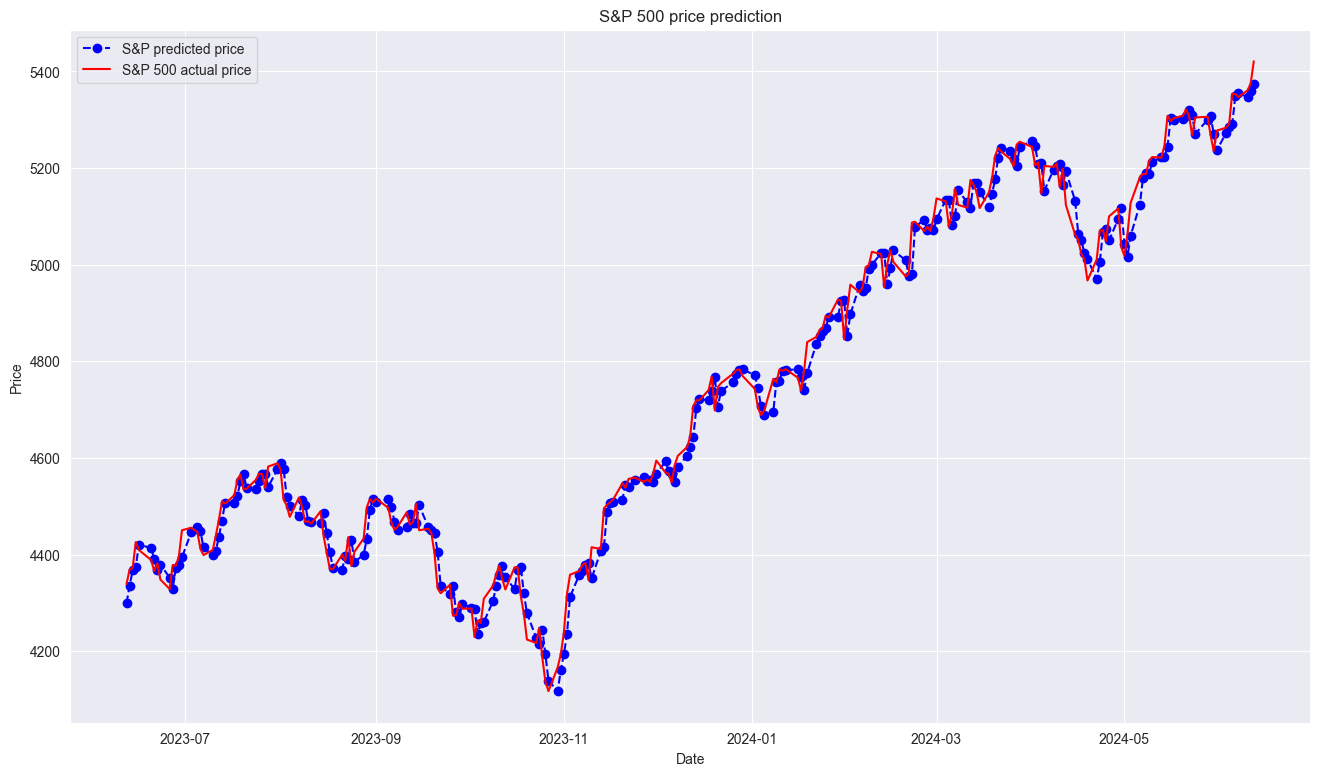

In [11]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'S&P predicted price' )
plt.plot(date_range, testing_data, color = 'red', label = 'S&P 500 actual price' )
plt.title('S&P 500 price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
model_predictions

array([4299.54330467, 4335.09293554, 4367.76505187, 4373.4617712 ,
       4420.67432101, 4413.54548989, 4389.96431577, 4367.08980995,
       4379.32254594, 4352.41439533, 4329.24338479, 4372.70936864,
       4379.19121246, 4394.33153508, 4445.90729485, 4457.39403195,
       4447.81978143, 4414.67662221, 4398.681063  , 4408.0081931 ,
       4436.81526991, 4470.20281517, 4507.72946041, 4507.4633338 ,
       4520.82111528, 4552.62209019, 4566.05981103, 4538.27961124,
       4534.83250637, 4552.98378155, 4567.0033067 , 4567.34012649,
       4540.20703907, 4576.5875961 , 4590.29595223, 4578.12166192,
       4519.01288849, 4500.3147185 , 4479.97852196, 4513.5071253 ,
       4503.04403229, 4469.86386113, 4467.41162714, 4464.63388107,
       4487.01803843, 4444.0289901 , 4405.29152976, 4372.3099363 ,
       4368.37313333, 4396.92841363, 4390.01922965, 4430.72118624,
       4384.27991364, 4400.0770356 , 4432.04797473, 4492.51187545,
       4515.98157433, 4508.93348805, 4514.63169903, 4499.03968

In [13]:
rmse = np.sqrt(mean_squared_error(model_predictions, testing_data))
rmse

34.25616343433637

In [14]:
model_predictions_2 = model_predictions[1:]

In [15]:
model_predictions_2

array([4335.09293554, 4367.76505187, 4373.4617712 , 4420.67432101,
       4413.54548989, 4389.96431577, 4367.08980995, 4379.32254594,
       4352.41439533, 4329.24338479, 4372.70936864, 4379.19121246,
       4394.33153508, 4445.90729485, 4457.39403195, 4447.81978143,
       4414.67662221, 4398.681063  , 4408.0081931 , 4436.81526991,
       4470.20281517, 4507.72946041, 4507.4633338 , 4520.82111528,
       4552.62209019, 4566.05981103, 4538.27961124, 4534.83250637,
       4552.98378155, 4567.0033067 , 4567.34012649, 4540.20703907,
       4576.5875961 , 4590.29595223, 4578.12166192, 4519.01288849,
       4500.3147185 , 4479.97852196, 4513.5071253 , 4503.04403229,
       4469.86386113, 4467.41162714, 4464.63388107, 4487.01803843,
       4444.0289901 , 4405.29152976, 4372.3099363 , 4368.37313333,
       4396.92841363, 4390.01922965, 4430.72118624, 4384.27991364,
       4400.0770356 , 4432.04797473, 4492.51187545, 4515.98157433,
       4508.93348805, 4514.63169903, 4499.03968322, 4467.64003

In [16]:
testing_data_2 = testing_data[1:]

In [17]:
rmse = np.sqrt(mean_squared_error(model_predictions_2, testing_data_2))
rmse

34.23427178512335